In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


In [2]:
data=pd.read_csv(r"C:\Users\hp\Desktop\Data Science Activites\dataset w7.csv")

In [3]:
data

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21
5,female,completed,40
6,male,none,30
7,female,none,12
8,male,none,18
9,male,none,24


# Carry out descriptive analytics on the dataset

In [4]:
data.describe()

,Total Marks
count,28.000000
mean,32.321429
std,12.454520
min,12.000000
25%,22.500000
50%,33.000000
75%,43.250000
max,50.000000


In [5]:
data.groupby('Gender')['Total Marks'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
female,16.0,33.750000,12.865976,12.0,25.50,39.0,43.50,50.0
male,12.0,30.416667,12.168950,14.0,21.75,29.0,43.25,47.0


In [6]:
data.groupby('Test preparation')['Total Marks'].describe()

,count,mean,std,min,25%,50%,75%,max
Test preparation,,,,,,,,
completed,7.0,44.571429,3.359422,40.0,43.0,44.0,46.0,50.0
none,21.0,28.238095,11.661495,12.0,18.0,27.0,38.0,48.0


# Check whether female and male students scored the same marks

In [7]:
import scipy.stats as stats

In [8]:
#check whether female and male students scored the same marks
#null hypothesis(h0)= female and male students not scored the same marks
#alternative hypothesis9(h1)= female and male students scored the same marks


In [9]:
female= data[data['Gender']=='female']
male=data[data['Gender']=='male']

In [10]:
# assumption for t test= normal distribution and equal variance


In [11]:
# to check the normal distribution
print(stats.shapiro([female['Total Marks']]))
print(stats.shapiro([male['Total Marks']]))

ShapiroResult(statistic=0.9078445434570312, pvalue=0.10742566734552383)
ShapiroResult(statistic=0.9093747138977051, pvalue=0.20944461226463318)


In [12]:
#Here in both above cases , p values is greater than 0.05 alpha value , hence the equal normal distribution assumption is true


In [13]:
# to check equal variance
stats.levene(female['Total Marks'], male['Total Marks'],center="mean")

LeveneResult(statistic=0.20673734725307086, pvalue=0.653110396551517)

In [14]:
#Here in both above cases , p values is greater than 0.05 alpha value , hence the equal variance assumption is true

In [15]:
stats.ttest_ind(data['Total Marks'][data['Gender'] == 'male'],
                 data['Total Marks'][data['Gender'] == 'female'],equal_var=True)


Ttest_indResult(statistic=-0.6940885268848668, pvalue=0.4937822317960763)

here p value is great than 0.05 alpha value ,hence we cannot reject the null hypothesis so we can conclude that female and male
students not scored equal marks
 

# Whether test preparation helps the students?

In [16]:
# check whether test preparation helps the students
#null hypothesis (h0)= test preperation doesnot helps the students
#alternative hypothesis(h1)= test preperation helps the students


In [17]:
completed=data[data['Test preparation']=='completed']
none=data[data['Test preparation']=='none']


In [18]:
# assumption for t test= normal distribution and equal variance
#normal distribution
print(stats.shapiro([completed['Total Marks']]))
print(stats.shapiro([none['Total Marks']]))




ShapiroResult(statistic=0.9187047481536865, pvalue=0.4593968093395233)
ShapiroResult(statistic=0.935218095779419, pvalue=0.17507188022136688)


In [19]:
# hence the p value is greater  than alpha value 0.05, hence the normal distribution assumption is true

In [20]:
# equal variance
stats.levene(completed['Total Marks'],none['Total Marks'],center="mean")

LeveneResult(statistic=8.022056069444217, pvalue=0.008806800984690211)

In [21]:
# p value is less than alpha value 0.05 so the assumption that total variance is equal is not true.
#hence in the case normal distribution assumption is true and equal variance asssumption is false so we use welch t test 




In [28]:
import scipy.stats as stats
stats.ttest_ind(data['Total Marks'][data['Test preparation'] == 'completed'],
                 data['Total Marks'][data['Test preparation'] == 'none'],equal_var=False)

Ttest_indResult(statistic=5.743210589066012, pvalue=4.884790752092096e-06)

In [40]:
#Here the p value is less than 0.05, hence we can reject the null hypothesis and confirm test prep helps the students
#0r
#df=n-1 = 28-1 =27 level of significance =5% = 0.05 the corresponding table value = 2.052

#calculated value =5.743210589066012  Here ,|t score|=5.743210589066012> 2.052 , then reject Ho and accept alternative hypothesis

Text(0.5, 1.0, 'Boxplot of Test Preparation vs Total Marks')

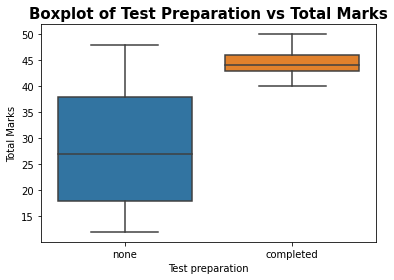

In [37]:
sns.boxplot(x="Test preparation",y="Total Marks",data = data)
plt.title("Boxplot of Test Preparation vs Total Marks",fontsize=15,fontweight="bold")